In [59]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/train.csv', delimiter=',')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/test.csv', delimiter=',')

In [62]:
test_data.shape

(10000, 1569)

In [63]:
import numpy as np
train_data.shape
train_data = train_data.iloc[: , :-1]
test_data = test_data.iloc[: , :-1]
#train_data = train_data/255.0
np_train = train_data.to_numpy()
np_train.shape
train_data[train_data < 0.5] = 0
train_data[train_data > 0.5] = 255
np_train = np.reshape(np_train, (50000, 28, 56, 1))

In [ ]:
one_point[0:784]

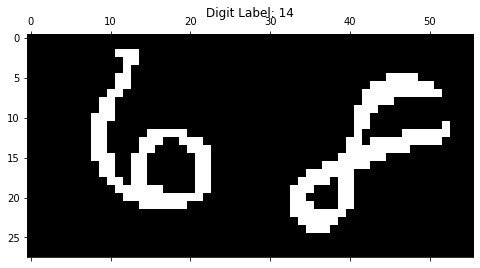

In [ ]:
plt.matshow(pixel_mat(one_point), cmap=plt.cm.gray)
plt.title("Digit Label: 14")
plt.show()

In [64]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers, callbacks
import time
import numpy as np
np.random.seed(77)


threshold = 125
train_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/logistic_regression/train_result.csv", delimiter=',')
y_train = train_results['Class']
nclasses = np.unique(y_train).size

I converted the train labels to one-hot vectors here

In [65]:
train_y = to_categorical(y_train)

# Initial Architectures

Before deciding on a 3 layer model, I experiemented with two other CNN models. These were wider models and more advanced models.

In [3]:
def arch():
    m = models.Sequential()
    #m.add(layers.Conv2D(64, (2,2), activation='relu', input_shape=train_X.shape[1:]))
    #m.add(layers.MaxPooling2D((2,2)))
    m.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=train_X.shape[1:]))
    m.add(layers.MaxPooling2D((2,2)))
    m.add(layers.Dropout(0.5))
    m.add(layers.Conv2D(256, (5,5), activation='relu'))
    m.add(layers.MaxPooling2D((2,2)))
    m.add(layers.Dropout(0.5))
    m.add(layers.Conv2D(256, (3,3), activation='relu'))
    m.add(layers.MaxPooling2D((2,2)))
    m.add(layers.Flatten())
    m.add(layers.Dense(256, activation='relu'))
    m.add(layers.Dense(nclasses, activation='softmax'))
    return m

def letnet():
  model = Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=(32,32), padding='same', activation='relu', input_shape=train_X.shape[1:]))
  model.add(layers.MaxPool2D(strides=2))
  model.add(layers.Conv2D(filters=48, kernel_size=(8,8), padding='valid', activation='relu'))
  model.add(layers.MaxPool2D(strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(84, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(nclasses, activation='softmax'))
  return model 

In [66]:
def create_diagram(model):
    s = '{}'.format(model.optimizer).split(' ')[0].split('.')[-1]
    print(s)
    print('{:12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('class', 'input', 'output', 'units', 'params', 'activ', 'label'))
    print('========================================================================')
    modellabel = s + ':'
    for nl, l in enumerate(model.layers):
        s = '{}'.format(l).split(' ')[0].split('.')[-1]
        print('{:12s}{:10d}'.format(s,l.input_shape[1]), end='')
        print('{:10d}'.format(l.output_shape[1]), end='')
        layerlabel = s[:2]
        try:
            layerlabel = f'{layerlabel}{l.units}'
            print('{:10d}'.format(l.units), end='')
        except:
            print('{:10s}'.format(''), end='')
        print('{:10d}'.format(l.count_params()), end='')
        try:
            s = '{}'.format(l.activation).split(' ')[1]
            layerlabel = layerlabel + s[:3]
            print('{:>10s}{:>10s}'.format(s, layerlabel))
        except:
            print('{:10s}{:>10s}'.format('', layerlabel))
        modellabel = modellabel + layerlabel
        if nl < len(model.layers)-1:
            modellabel = modellabel + '|'
    print('labelling this model as', modellabel,'\n')
    return modellabel

    
def compiletis(model, op):
    model.compile(optimizer=op,
                      loss='categorical_crossentropy',
                   metrics=['accuracy'])
    return model


cb = callbacks.EarlyStopping(monitor='val_loss',
                             min_delta=0,
                             patience=5,
                             verbose=0, 
                             mode='auto')

def fittis(model, bs, ep):
    tic = time.perf_counter()
    history = model.fit(train_X, train_y, 
                        epochs=ep, batch_size=bs, 
                        validation_split=.3, verbose=1,
                        callbacks = [cb])
    
    my_history = []
    print(history)
    history_dict = history.history
    print(history_dict.keys())
    
    #plottis(history)
    
    train_acc = history.history['accuracy']
    train_los = history.history['loss']
    val_acc   = history.history['val_accuracy']
    val_los   = history.history['val_loss']
    return model, myhistory

train_X=np_train
train_y=train_y
#train_X=
myhistory = []
model = compiletis(arch(), 'rmsprop')
create_diagram(model)
s = '{}'.format(model.layers[0])
model, h = fittis(model, bs=4096, ep=100)
myhistory.append(h)
#RMSprop

RMSprop
class            input    output     units    params     activ     label
Conv2D              28        24                3328      relu     Corel
MaxPooling2D        24        12                   0                  Ma
Dropout             12        12                   0                  Dr
Conv2D              12         8              819456      relu     Corel
MaxPooling2D         8         4                   0                  Ma
Dropout              4         4                   0                  Dr
Conv2D               4         2              590080      relu     Corel
MaxPooling2D         2         1                   0                  Ma
Flatten              1      1024                   0                  Fl
Dense             1024       256       256    262400      relu  De256rel
Dense              256        19        19      4883   softmax   De19sof
labelling this model as RMSprop:Corel|Ma|Dr|Corel|Ma|Dr|Corel|Ma|Fl|De256rel|De19sof 

Epoch 1/100
9/9 [============

In [ ]:

model_errors = model.predict(train_X)
predictions = np.argmax(model_errors, axis=1)
print('np.argmax(a, axis=1): {0}'.format(np.argmax(model_errors, axis=1)))
print((y_train[0]))
for i in range(0, len(predictions)):
  if predictions[i] != y_train[i]:
    print(i)

In [78]:
train_X[2192].shape

(28, 56, 1)

In [79]:
def pixel_mat(vec, dim1, dim2):
    pixel_mat = vec.reshape(dim1, dim2)
    return pixel_mat

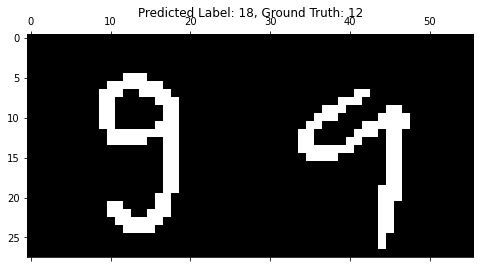

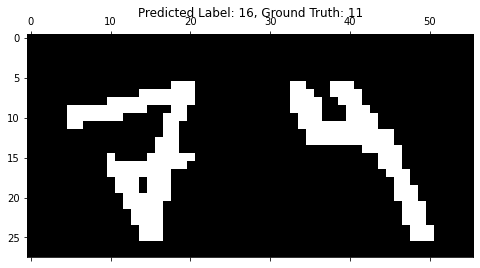

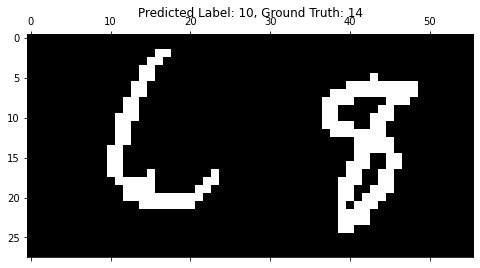

In [86]:
plt.matshow(pixel_mat(train_X[2192], 28, 56), cmap=plt.cm.gray)
plt.title("Predicted Label: {}, Ground Truth: {}".format(predictions[2192],y_train[2192] ))
plt.show()

plt.matshow(pixel_mat(train_X[49803], 28, 56), cmap=plt.cm.gray)
plt.title("Predicted Label: {}, Ground Truth: {}".format(predictions[49803],y_train[49803] ))
plt.show()

plt.matshow(pixel_mat(train_X[49765], 28, 56), cmap=plt.cm.gray)
plt.title("Predicted Label: {}, Ground Truth: {}".format(predictions[49765],y_train[49765] ))
plt.show()

# More Advanced Models

In [ ]:
# example of creating a CNN with an efficient inception module
#from keras import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.utils import plot_model


def vggnn():
# function for creating a projected inception module
  def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    # 1x1 conv
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    # 3x3 conv
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    # 5x5 conv
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out
  
  # define model input
  visible = Input(shape=(256, 256, 3))
  # add inception block 1
  layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
  # add inception block 1
  layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
  # create model
  model = Model(inputs=visible, outputs=layer)
  #model.add(layers.Dense(nclasses, activation='softmax'))
  # summarize model
  model.summary()
  return model 

In [ ]:
import numpy as np
# import the models for further classification experiments
from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet,
        inception_v3
    )
 
# init the models
vgg_model = vgg16.VGG16(weights='imagenet')
 
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
resnet_model = resnet50.ResNet50(weights='imagenet')
 
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

# Evaluating our Model's Performance

In [ ]:
output_dropout_layers = model.predict(np_test)

In [ ]:
output_dropout_layers = model.predict(np_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
output = model.predict(np_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print('np.argmax(a, axis=1): {0}'.format(np.argmax(output, axis=1)))

np.argmax(a, axis=1): [14  7 10 ... 10  4  6]


In [ ]:
file = open("/content/drive/MyDrive/Colab Notebooks/cnn_predictions_larger_model_dropout_larger_kernel_98.csv","a")

file.write("Index,Class\n")
count = 0 
for prediction in np.argmax(output_dropout_layers, axis=1):
    file.write(str(count) + "," + str(prediction) + "\n")
    count = count + 1 
file.close()

# Training Results

I was having issue with the kernal discconecting so I saved my training results

In [9]:
best_training_results = "/content/drive/MyDrive/Colab Notebooks/logistic_regression/best_training.txt"

In [42]:
with open(best_training_results) as f:
  train_loss = []
  val_loss = []
  val_accuracy = []
  train_accuracy = []
  y = []
  count = 0 
  for line in f:
    line_output = line.split("-")
    if len(line_output) > 1:
      count = count + 1
      training_loss = float(line_output[2].split(":")[1].replace(" ", ""))
      training_acc = float(line_output[3].split(":")[1].replace(" ", ""))
      validation_loss = float(line_output[4].split(":")[1].replace(" ", ""))
      validation_acc = float(line_output[5].split(":")[1].replace(" ", ""))
      train_loss.append(training_loss)
      val_loss.append(validation_loss)
      train_accuracy.append(training_acc)
      val_accuracy.append(validation_acc)
      y.append(count)

Text(0, 0.5, 'accuracy')

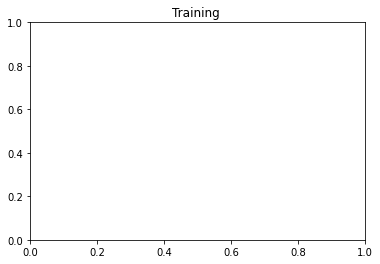

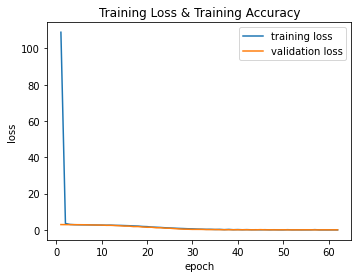

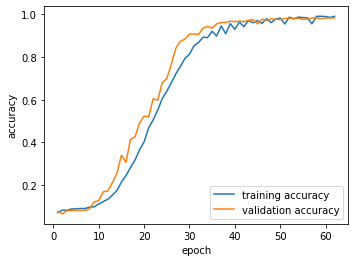

In [58]:
import matplotlib.pyplot as plt
plt.title("Training ")
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(y, train_loss , label='training loss')
plt.plot(y, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.title("Training Loss & Training Accuracy")
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(y, train_accuracy , label='training accuracy')
plt.plot(y, val_accuracy, label='validation accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
